# **Approximations and Errors in Computation**.  Introduction, Significant digits, Rounding error, Truncation error, Absolute and relative error, Error propagation.

1. Significant digits and rounding

Example 1: Determining the number of significant digits

Task: Write a program that determines the number of significant digits in a number.

In [8]:
def count_significant_digits(number):
    # Convert the number to a string for ease of processing
    num_str = str(number).lstrip('0').rstrip('0').replace('.', '')
    # We exclude zeros if they are not significant.
    return len(num_str)

# Example of use
numbers = [0.00386, 4500, 3.589]
for num in numbers:
    print(f"The number {num} contains {count_significant_digits(num)} significant digits.")

The number 0.00386 contains 5 significant digits.
The number 4500 contains 2 significant digits.
The number 3.589 contains 4 significant digits.


1. We convert the number to a string by removing leading zeros (lstrip('0')).
2. We remove trailing zeros (rstrip('0')), if they are to the right of the dot.
3. We remove the dot itself, since it is not considered a digit.
4. We count the remaining characters, which are significant digits.

Example 2: Rounding a number

Problem: Implement a program to round a number to a given number of significant digits.

In [23]:
def round_to_significant_figures(number, n):
    # Round the number to n significant digits
    if number == 0:
        return 0
    else:
        scale = -int(f"{number:e}".split('e')[1]) + (n - 1)
        return round(number, scale)

# Example of use
number = 123.4546789 
significant_figures = 4
rounded_number = round_to_significant_figures(number, significant_figures)
print(f"The number {number} has been rounded to {significant_figures} significant digits: {rounded_number}")

The number 123.4546789 has been rounded to 4 significant digits: 123.5


You need to convert the number to exponential form, and get the number normalized so that the first significant digit is before the decimal point.
And the part after e (the exponent) indicates how much the order of the number is shifted (that is, a power of 10). Like 123,4567 ~ 1,234567e+02


".split('e')" splits the string into two parts: ["1.234568", "+02"].

Scale indicates that the number should be rounded to 1 decimal place.

1. Check that the number is not 0, as this is a special case.
2. Calculate the rounding scale based on the scientific notation of the number (f"{number:e}").
3. Apply round() with the calculated scale.

2. Absolute and relative errors

Example 1: Calculating absolute and relative errors

Task: Write a program to calculate absolute and relative errors.

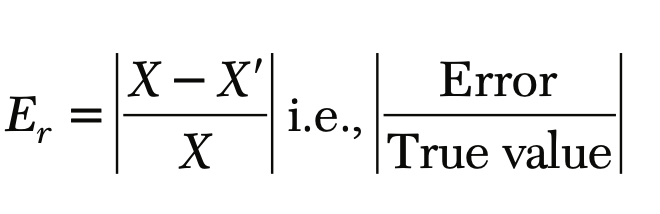

X is the true value of a quantity and X' is its approximate value

|X-X'|=absolute error

In [4]:
def calculate_errors(true_value, approx_value):
    absolute_error = abs(true_value - approx_value)  # Absolute error
    relative_error = absolute_error / true_value if true_value != 0 else float('inf')  # Relative error
    return absolute_error, relative_error

# Example of use
true_value = 3.14159  # True value
approx_value = 3.14   # Approximate value
absolute_error, relative_error = calculate_errors(true_value, approx_value)

print(f"Absolute error: {absolute_error}")
print(f"Relative error: {relative_error:.5f}")

Absolute error: 0.0015899999999997583
Relative error: 0.00051


1. Absolute error is calculated as the absolute difference between the true and approximate values.
2. Relative error is defined as the ratio of the absolute error to the true value. If the true value is 0, the error becomes infinite.

Example 2: Percentage Error

Task: Add a percentage error calculation.

In [ ]:
def calculate_percentage_error(true_value, approx_value):
    absolute_error = abs(true_value - approx_value)
    percentage_error = (absolute_error / true_value) * 100 if true_value != 0 else float('inf')
    return percentage_error

# Example of use
true_value = 100
approx_value = 95
percentage_error = calculate_percentage_error(true_value, approx_value)
print(f"Percentage error: {percentage_error:.2f}%")

1. Percentage error is the absolute error multiplied by 100 and divided by the true value.
2. Uses a similar approach as for relative error.

3. Error propagation

Example: Adding numbers with errors

Task: Write a function that demonstrates error propagation during addition.

In [24]:
def error_propagation_addition(a, b, error_a, error_b):
    # Addition of values
    result = a + b
    # Error propagation
    propagated_error = error_a + error_b
    return result, propagated_error

# Example of use
a, b = 9.0, 3.0
error_a, error_b = 0.6, 0.2
result, propagated_error = error_propagation_addition(a, b, error_a, error_b)

print(f"Result of addition: {result} ± {propagated_error}")

Result of addition: 12.0 ± 0.8


1. When adding errors, we simply add the absolute errors of two numbers.
2. The result is presented in the format: result ± error.

4. Truncation and Rounding

Example 1: Truncation of a number

Problem: Write a program to truncate a number to a specified number of decimal places.

In [25]:
def truncate_number(number, decimal_places):
    # Calculate the multiplier for truncation
    multiplier = 10 ** decimal_places
    truncated = int(number * multiplier) / multiplier
    return truncated

# Example of use
number = 3.1415926535 
decimal_places = 3
truncated_number = truncate_number(number, decimal_places)
print(f"The number {number} truncated to {decimal_places} decimal places: {truncated_number}")

The number 3.1415926535 truncated to 3 decimal places: 3.141


1. Truncation removes all numbers after the specified number of places without rounding.
2. We multiply the number by 10 ** decimal_places to temporarily get rid of the fractional part.
3. Then we use int() to truncate the fractional part and divide back.

Example 2: Difference between rounding and truncation

Task: Write code that compares truncation and rounding of a number.

In [26]:
def compare_rounding_and_truncation(number, decimal_places):
    truncated = truncate_number(number, decimal_places)
    rounded = round(number, decimal_places)
    return truncated, rounded

# Example of use
number = 3.1415926535
decimal_places = 3
truncated, rounded = compare_rounding_and_truncation(number, decimal_places)
print(f"Truncated number: {truncated}")
print(f"Rounded number: {rounded}")

Truncated number: 3.141
Rounded number: 3.142


1. Truncation always reduces the value of a number by removing extra characters.
2. Rounding takes into account the next digit: if it is ≥ 5, then the last remaining digit is increased.

5. Propagation of errors in multiplication

Example: Calculating the error of a product

Problem: Calculate the absolute error of the product of two numbers, taking into account their errors.

In [27]:
def error_propagation_multiplication(a, b, error_a, error_b):
    # Calculating the result
    result = a * b
    # Error propagation
    propagated_error = abs(b) * error_a + abs(a) * error_b #book formula
    return result, propagated_error

# Example of use
a, b = 10.0, 2.0
error_a, error_b = 0.1, 0.05
result, propagated_error = error_propagation_multiplication(a, b, error_a, error_b)

print(f"The result of multiplication: {result} ± {propagated_error}")

The result of multiplication: 20.0 ± 0.7


1. For a product, errors are calculated as the sum of the absolute changes caused by the errors of each multiplier.
2. This is important for calculations that require high accuracy, such as in engineering calculations.